In [1]:
# import packages
import numpy as np
import jax.scipy as jsp # boost computation
import matplotlib.pyplot as plt
import imageio
from os import listdir
from scipy.sparse.linalg import eigs

In [2]:
# interactive plotting
#%matplotlib notebook
%matplotlib inline

### HW5, Q1 

### Q1,a) use eigs give the ground truth eigenvalues and eigenvectors

In [11]:
N = 10
a = np.random.randn(N, N)
m = np.tril(a) + np.tril(a, -1).T
true_lambda, true_vec = eigs(m,k=10)
print("ground truth eigenvalues: " + str(true_lambda))
print("eigenvector for largest eigenvalues:")
print(true_vec[:,0])

ground truth eigenvalues: [ 6.60836165+0.j -5.34704838+0.j -4.6520863 +0.j -3.42993679+0.j
 -2.58401996+0.j  3.70353345+0.j  2.57438465+0.j  3.24742656+0.j
  0.1484506 +0.j -0.02547122+0.j]
eigenvector for largest eigenvalues:
[ 0.24398087  0.10934004 -0.24739042  0.04289295 -0.2804554  -0.31357739
  0.17904138  0.07073966 -0.58049776 -0.56076082]


### Q1,b) find largest eigenvalues with the power iteration method

In [12]:
def power_iterate(A):
    n1 = A.shape[0]
    n2 = A.shape[1]
    v=np.random.randn(n1,1)
    lambda_max = np.inf
    tol = 1e-5
    lambdaold = 1
    lambda_ite=[]
    
    while abs(lambda_max-lambdaold) > tol:
        lambdaold = lambda_max
        vnew = np.dot(A,v)
        v = vnew/np.linalg.norm(vnew)
        #print(v.shape)
        lambda_max = np.dot(np.dot(v.T,A),v)
        #print(lambda_max)
        lambda_ite.append(lambda_max)
    return lambda_ite, v

In [13]:
max_lambda_ite, max_vec = power_iterate(m)

In [14]:
max_lambda_ite

[array([[-2.90215217]]),
 array([[-2.9846089]]),
 array([[-2.5498183]]),
 array([[-1.57401232]]),
 array([[-0.29189477]]),
 array([[1.05892169]]),
 array([[2.32952906]]),
 array([[3.43256423]]),
 array([[4.32733173]]),
 array([[5.0128019]]),
 array([[5.51453817]]),
 array([[5.86939725]]),
 array([[6.11424178]]),
 array([[6.28028445]]),
 array([[6.39156565]]),
 array([[6.46555577]]),
 array([[6.51449166]]),
 array([[6.54674399]]),
 array([[6.5679517]]),
 array([[6.58187588]]),
 array([[6.59100892]]),
 array([[6.59699552]]),
 array([[6.600918]]),
 array([[6.60348735]]),
 array([[6.60517006]]),
 array([[6.60627195]]),
 array([[6.60699346]]),
 array([[6.60746587]]),
 array([[6.60777517]]),
 array([[6.60797768]]),
 array([[6.60811027]]),
 array([[6.60819707]]),
 array([[6.6082539]]),
 array([[6.60829111]]),
 array([[6.60831547]]),
 array([[6.60833141]]),
 array([[6.60834186]]),
 array([[6.60834869]])]

In [15]:
np.dot(m,max_vec) - np.array(max_lambda_ite)[-1,0,0]*np.array(max_vec)

array([[ 0.00346209],
       [-0.00393416],
       [-0.00053583],
       [ 0.00576378],
       [ 0.00222752],
       [-0.00161879],
       [ 0.00081064],
       [-0.00378992],
       [ 0.00633363],
       [-0.00559129]])

/Users/wmingch/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


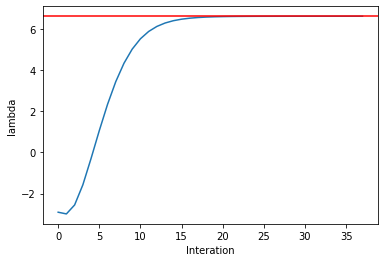

In [17]:
plt.plot(np.array(max_lambda_ite)[:,0,0])
plt.axhline(y=true_lambda[0],c='r')
plt.ylabel('lambda')
plt.xlabel('Interation')
plt.savefig('HW5_1b.png',dpi=200)

### c) all ten eigenvalues by Rayleigh Quotient iteration and guessing initial "eigenvectors"

In [18]:
def rayquotient(A):
    n1 = A.shape[0]
    n2 = A.shape[1]
    v=np.random.randn(n1,1)
    lambda_max = np.dot(np.dot(v.T,A),v)
    tol = 1e-5
    lambdaold = 1
    lambda_ite=np.zeros((30,n1))
    v_final =np.zeros((n1,n2))
    
    i=0
    k=0
    while abs(lambda_max-lambdaold) > tol:
        lambdaold = lambda_max
        w = np.dot(np.linalg.inv((A-lambda_max*np.eye(n1,n1))),v)
        #w = (A-lambda_max*np.eye(n1,n1))/v
        #print(w.shape)
        v=w/np.linalg.norm(w)
        #print(v.shape)
        lambda_max = np.dot(np.dot(v.T,A),v)
        #print(lambda_max.shape)
        lambda_ite[i,k] = lambda_max
        v_final[:,k] = v[:,0]
        i = i+1

    i=0
    k=1
    v=np.random.randn(n1,1)
    test = np.reshape(np.dot(v.T,v_final[:,k-1])*v_final[:,k-1],(10,1))
    print(test.shape)
    v = v-np.reshape(np.dot(v.T,v_final[:,k-1])*v_final[:,k-1],(10,1))
    print(v.shape)
    v = v/np.linalg.norm(v)
    print(v.shape)
    lambda_max = np.dot(np.dot(v.T,A),v)
    print(lambda_max.shape)
    tol = 1e-5
    lambdaold = 1
    while abs(lambda_max-lambdaold) > tol:
        lambdaold = lambda_max
        w = np.dot(np.linalg.inv((A-lambda_max*np.eye(n1,n1))),v)
        #w = (A-lambda_max*np.eye(n1,n1))/v
        #print(w.shape)
        v=w/np.linalg.norm(w)
        #print(v.shape)
        lambda_max = np.dot(np.dot(v.T,A),v)
        #print(lambda_max.shape)
        lambda_ite[i,k] = lambda_max
        v_final[:,k] = v[:,0]
        i = i+1        
    
    return lambda_ite, v_final

In [19]:
#use for the vector initialzied for Rayleigh Quotient iteration,
#the initial "eigenvectors" try to perpendicular to each other, so we could find all the eigenvalues
def vector_subtract(v_k_random,v_final,step):
    vector_subtract = np.zeros_like(v_k_random)
    for i in range(step):
        vector_subtract = vector_subtract + np.reshape(np.dot(v_k_random.T,v_final[:,i])*v_final[:,i],(10,1))
    return vector_subtract

In [20]:
def rayquotient(A):
    n1 = A.shape[0]
    n2 = A.shape[1]
    v=np.random.randn(n1,1)
    lambda_max = np.dot(np.dot(v.T,A),v)
    tol = 1e-5
    lambdaold = 1
    lambda_ite=[] #np.zeros((300,n1))
    v_final =np.zeros((n1,n2))
    
    i=0
    k=0
    lambda_iter_part=[]
    while abs(lambda_max-lambdaold) > tol:
        lambdaold = lambda_max
        w = np.dot(np.linalg.inv((A-lambda_max*np.eye(n1,n1))),v)
        #w = (A-lambda_max*np.eye(n1,n1))/v
        #print(w.shape)
        v=w/np.linalg.norm(w)
        #print(v.shape)
        lambda_max = np.dot(np.dot(v.T,A),v)
        #print(lambda_max.shape)
        lambda_iter_part.append(lambda_max)
        v_final[:,k] = v[:,0]
        i = i+1
    lambda_ite.append(lambda_iter_part)
    
    i=0
    for k in range(1,10):
        print(k)
        lambda_iter_part=[]
        v=np.random.randn(n1,1)
        v = v - vector_subtract(v,v_final,k)
        #v = v-np.reshape(np.dot(v.T,v_final[:,k-1])*v_final[:,k-1],(10,1))
        v = v/np.linalg.norm(v)
        lambda_max = np.dot(np.dot(v.T,A),v)
        #print(lambda_max.shape)
        tol = 1e-5
        lambdaold = 1
        while abs(lambda_max-lambdaold) > tol:
            lambdaold = lambda_max
            w = np.dot(np.linalg.inv((A-lambda_max*np.eye(n1,n1))),v)
            #w = (A-lambda_max*np.eye(n1,n1))/v
            #print(w.shape)
            v=w/np.linalg.norm(w)
            #print(v.shape)
            lambda_max = np.dot(np.dot(v.T,A),v)
            #print(lambda_max.shape)
            lambda_iter_part.append(lambda_max)
            v_final[:,k] = v[:,0]
            i = i+1        
        lambda_ite.append(lambda_iter_part)
        
    return lambda_ite, v_final

In [21]:
lambda_all_ite, v_all = rayquotient(m)

1
2
3
4
5
6
7
8
9


Rayleigh Quotient iteration found
eig: [-3.42680421 -3.42994356 -3.42993679]
eig: [-2.58433563 -2.58401996 -2.58401996]
eig: [2.60807444 2.57447724 2.57438465 2.57438465]
eig: [-0.01906888 -0.02545645 -0.02547122 -0.02547122]
eig: [0.762688   0.16412205 0.14845087 0.1484506 ]
eig: [3.27555838 3.24755411 3.24742656 3.24742656]
eig: [3.39191215 3.70349994 3.70353345 3.70353345]
eig: [4.99362713 6.56300983 6.60836099 6.60836165]
eig: [-4.65217461 -4.6520863  -4.6520863 ]
eig: -5.347048378279489
Rayleigh Quotient iteration found
[-0.3882252  -0.57286771  0.21506669 -0.34186985  0.29730566 -0.14363267
 -0.2719845  -0.12446925 -0.26162466 -0.30172584]
[ 0.5151251   0.16395013  0.05941299 -0.4955819   0.57880833 -0.21901219
  0.15539518  0.19989933  0.10688588 -0.01085112]
[-0.31364931  0.26085503 -0.42257665  0.28340899  0.53258902 -0.27448279
  0.05956062 -0.33269742 -0.22786987  0.22256571]
[-0.1950051   0.53301259  0.01649055 -0.40937001 -0.16744615  0.01184856
 -0.15982521 -0.50303762  0

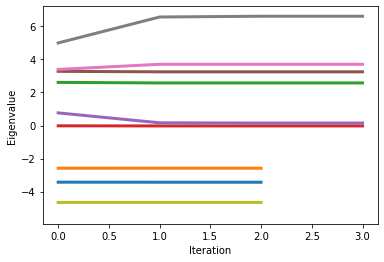

In [23]:
for i in range(10):
    plt.plot(np.squeeze(lambda_all_ite[i]),linewidth=3)
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue')
plt.savefig('HW5_1c.png',dpi=200)

print('Rayleigh Quotient iteration found')
for i in range(10):
    print('eig: ' + str(np.squeeze(lambda_all_ite[i])))
print('Rayleigh Quotient iteration found')
for i in range(10):
    print(v_all[:,i])    

In [72]:
v_all[:,0]

array([-0.02635602, -0.39367877, -0.14269271,  0.08054542,  0.04348939,
        0.56662691,  0.67445736, -0.15999752, -0.11568231, -0.02533563])

### d) repeate b) and c) with a radndom matrix that is not symmetric

In [25]:
N = 10
a = np.random.randn(N,N)
true_lambda, true_vec = eigs(a,k=10)
print("ground truth eigenvalues: " + str(true_lambda))

ground truth eigenvalues: [-3.23404093+0.j         -2.42589675+1.66310163j -2.42589675-1.66310163j
 -0.39792689+0.33942606j -0.39792689-0.33942606j  2.23865068+0.j
  1.87254745+1.04520803j  1.87254745-1.04520803j  1.30418821+0.27204316j
  1.30418821-0.27204316j]


/Users/wmingch/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1269: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


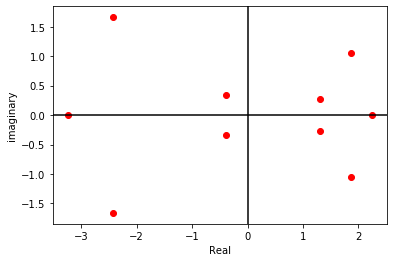

In [26]:
true_lambda_real = np.zeros(10)
true_lambda_imag = np.zeros(10)
for i in range(10):
    z = complex(true_lambda[i])
    true_lambda_real[i] = z.real
    true_lambda_imag[i] = z.imag
plt.scatter(true_lambda_real,true_lambda_imag,color='red')
plt.xlabel('Real')
plt.ylabel('imaginary')
plt.axvline(x=0,c='k')
plt.axhline(y=0,c='k')
plt.savefig('HW5_1d.png',dpi=200)